Some typical NumPy 'random' functions:

In [ ]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [1]:
# Write your code for AIM #1 here
import pandas as pd
import numpy as np
import time

start_time = time.time()
df = pd.DataFrame({'data': np.random.randint(1, 101, size=1000000)})
pandas_time = time.time() - start_time
print(f"Time taken by Pandas: {pandas_time} seconds")

start_time = time.time()
np_array = np.random.randint(1, 101, size=1000000)
numpy_time = time.time() - start_time
print(f"Time taken by NumPy: {numpy_time} seconds")

if pandas_time < numpy_time:
    print("Pandas is faster.")
elif pandas_time > numpy_time:
    print("NumPy is faster.")
else:
    print("Both are equally fast.")


Time taken by Pandas: 0.005519866943359375 seconds
Time taken by NumPy: 0.0050008296966552734 seconds
NumPy is faster.


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [19]:
# Write your code for AIM #2 here
import pandas as pd
import numpy as np
import time

start_time = time.time()
df = pd.read_csv('sleep_health.csv')
Duration_mean = df['Sleep Duration'].mean()
Systolic_mean = df['Systolic blood pressure'].mean()
Diastolic_mean = df['Diastolic blood pressure'].mean()
Heart_mean = df['Heart Rate'].mean()
Daily_mean = df['Daily Steps'].mean()
print("Pandas Mean:")
print(f"Sleep Duration: {Duration_mean}\nSystolic blood pressure: {Systolic_mean}\nDiastolic blood pressure: {Diastolic_mean}\nHeart Rate: {Heart_mean}\nDaily Steps: {Daily_mean}\n")
pandas_time = time.time() - start_time

start_time = time.time()
# Loading the CSV file as an array in NumPy
data = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=0, dtype=None, encoding='utf-8', names=True)
Duration_mean = np.mean(data["Sleep_Duration"])
Systolic_mean = np.mean(data["Systolic_blood_pressure"])
Diastolic_mean = np.mean(data["Diastolic_blood_pressure"])
Heart_mean = np.mean(data["Heart_Rate"])
Daily_mean = np.mean(data["Daily_Steps"])
print("NumPy Mean:")
print(f"Sleep Duration: {Duration_mean}\nSystolic blood pressure: {Systolic_mean}\nDiastolic blood pressure: {Diastolic_mean}\nHeart Rate: {Heart_mean}\nDaily Steps: {Daily_mean}\n")
numpy_time = time.time() - start_time

start_time = time.time()
correlation = df[['Sleep Duration', 'Systolic blood pressure', 'Diastolic blood pressure', 'Heart Rate', 'Daily Steps']].corr()
corr1 = df[['Sleep Duration','Age']].corr()
corr2 = df[['Sleep Duration','Heart Rate']].corr()
corr3 = df[['Sleep Duration','Daily Steps']].corr()
print("Pandas correlation:")
display(correlation)
display(corr1)
display(corr2)
display(corr3)
pandas_time =pandas_time + time.time() - start_time

# Calculate the correlation in NumPy using np.corrcoef()
# The correlation coefficient is located in the off-diagonal elements [0,1] or [1,0]
start_time = time.time()
variables = np.column_stack((data["Sleep_Duration"], data["Systolic_blood_pressure"], data["Diastolic_blood_pressure"], data["Heart_Rate"], data["Daily_Steps"]))
correlation_np = np.corrcoef(variables)
correlation_np1 = np.corrcoef(data["Sleep_Duration"],data["Age"])
correlation_np2 = np.corrcoef(data["Sleep_Duration"],data["Heart_Rate"])
correlation_np3 = np.corrcoef(data["Sleep_Duration"],data["Daily_Steps"])
display(correlation_np)
display(correlation_np1)
display(correlation_np2)
display(correlation_np3)
numpy_time = numpy_time + time.time() - start_time

# Use np-std() to calculate Standard deviation
start_time = time.time()
std_dev_pd = df['Sleep Duration'].std()
print("Standard Deviation using Pandas:", std_dev_pd)
pandas_time =pandas_time + time.time() - start_time

start_time = time.time()
std_dev_np = np.std(data["Sleep_Duration"])
print("Standard Deviation using NumPy:", std_dev_np)
numpy_time = numpy_time + time.time() - start_time

print()
print(f"Time taken by Pandas: {pandas_time} seconds")
print(f"Time taken by NumPy: {numpy_time} seconds")

if pandas_time < numpy_time:
    print("Pandas is faster.")
elif pandas_time > numpy_time:
    print("NumPy is faster.")
else:
    print("Both are equally fast.")



Pandas Mean:
Sleep Duration: 7.132085561497325
Systolic blood pressure: 128.55347593582889
Diastolic blood pressure: 84.64973262032086
Heart Rate: 70.16577540106952
Daily Steps: 6816.844919786096

NumPy Mean:
Sleep Duration: 7.132085561497325
Systolic blood pressure: 128.55347593582889
Diastolic blood pressure: 84.64973262032086
Heart Rate: 70.16577540106952
Daily Steps: 6816.844919786096

Pandas correlation:


,Sleep Duration,Systolic blood pressure,Diastolic blood pressure,Heart Rate,Daily Steps
Sleep Duration,1.000000,-0.180406,-0.166570,-0.516455,-0.039533
Systolic blood pressure,-0.180406,1.000000,0.972885,0.294143,0.103342
Diastolic blood pressure,-0.166570,0.972885,1.000000,0.271092,0.241986
Heart Rate,-0.516455,0.294143,0.271092,1.000000,-0.030309
Daily Steps,-0.039533,0.103342,0.241986,-0.030309,1.000000


,Sleep Duration,Age
Sleep Duration,1.000000,0.344709
Age,0.344709,1.000000


,Sleep Duration,Heart Rate
Sleep Duration,1.000000,-0.516455
Heart Rate,-0.516455,1.000000


,Sleep Duration,Daily Steps
Sleep Duration,1.000000,-0.039533
Daily Steps,-0.039533,1.000000


array([[1.        , 0.99990556, 0.99990556, ..., 0.9999636 , 0.9999636 ,
        0.9999636 ],
       [0.99990556, 1.        , 1.        , ..., 0.99998069, 0.99998069,
        0.99998069],
       [0.99990556, 1.        , 1.        , ..., 0.99998069, 0.99998069,
        0.99998069],
       ...,
       [0.9999636 , 0.99998069, 0.99998069, ..., 1.        , 1.        ,
        1.        ],
       [0.9999636 , 0.99998069, 0.99998069, ..., 1.        , 1.        ,
        1.        ],
       [0.9999636 , 0.99998069, 0.99998069, ..., 1.        , 1.        ,
        1.        ]])

array([[1.        , 0.34470936],
       [0.34470936, 1.        ]])

array([[ 1.        , -0.51645489],
       [-0.51645489,  1.        ]])

array([[ 1.        , -0.03953254],
       [-0.03953254,  1.        ]])

Standard Deviation using Pandas: 0.7956567308898189
Standard Deviation using NumPy: 0.7945923066929989

Time taken by Pandas: 0.013587236404418945 seconds
Time taken by NumPy: 0.008155107498168945 seconds
NumPy is faster.


AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

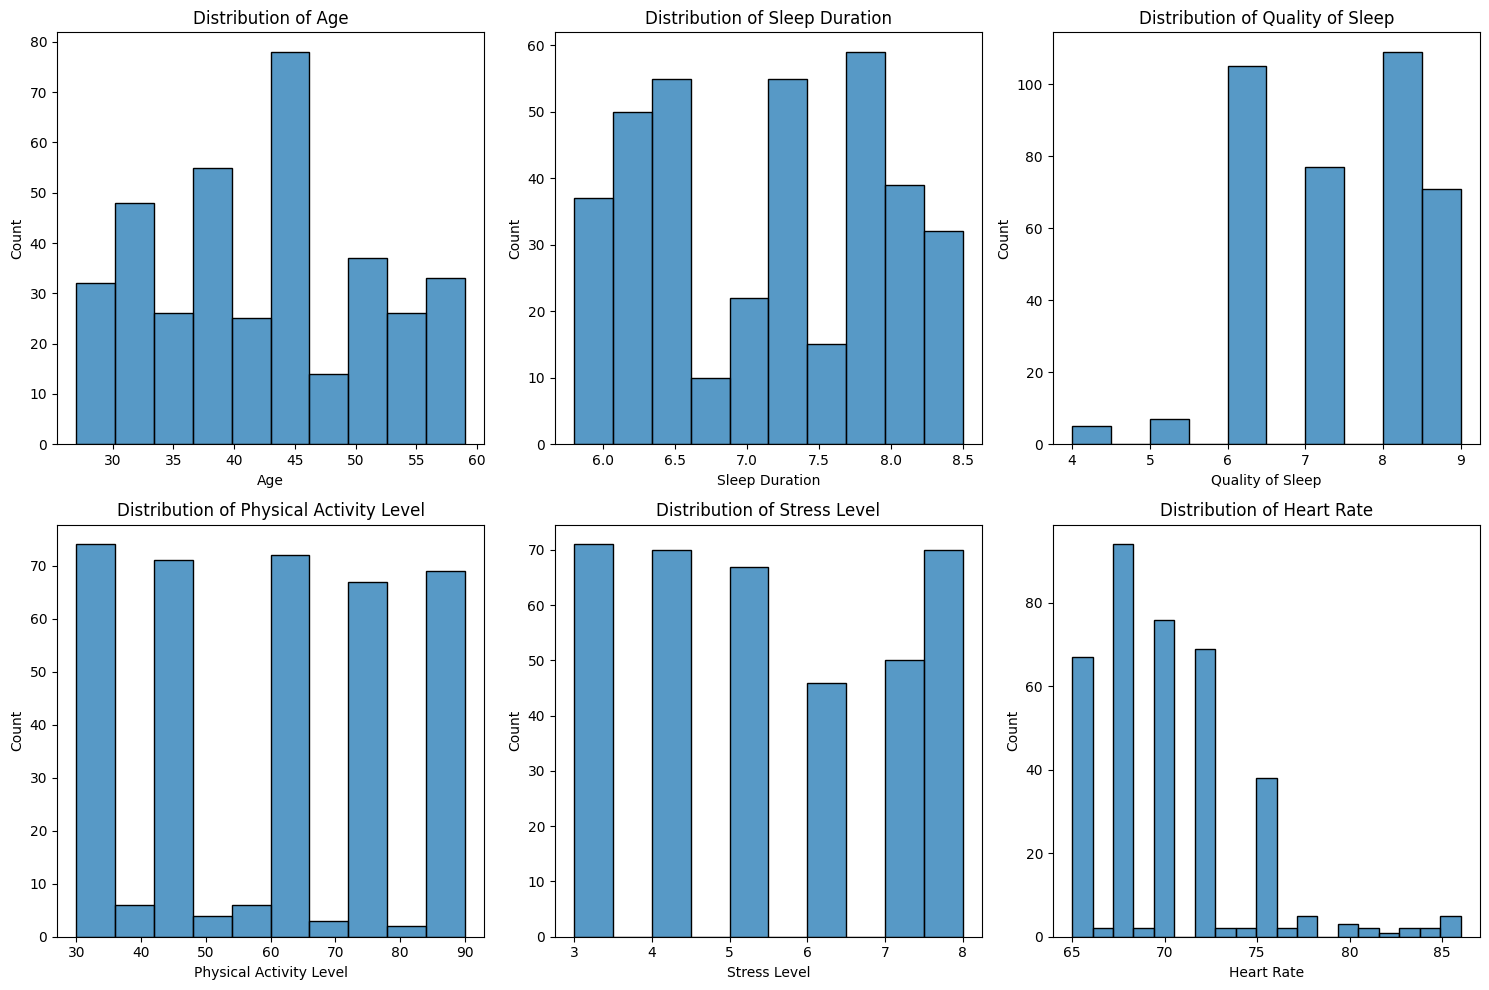

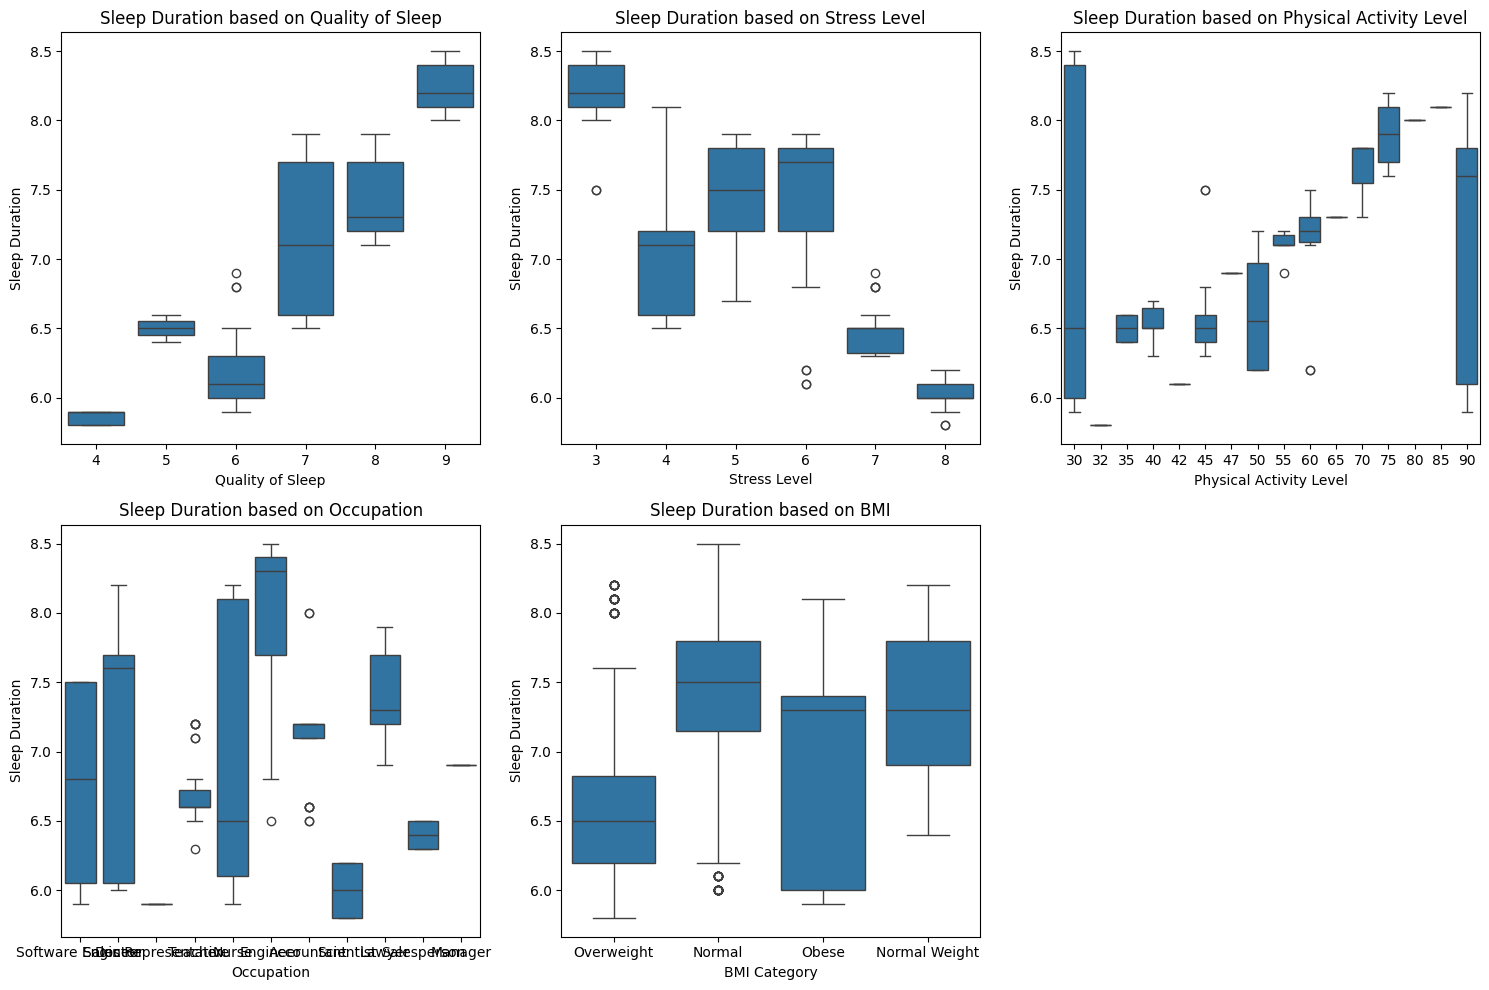

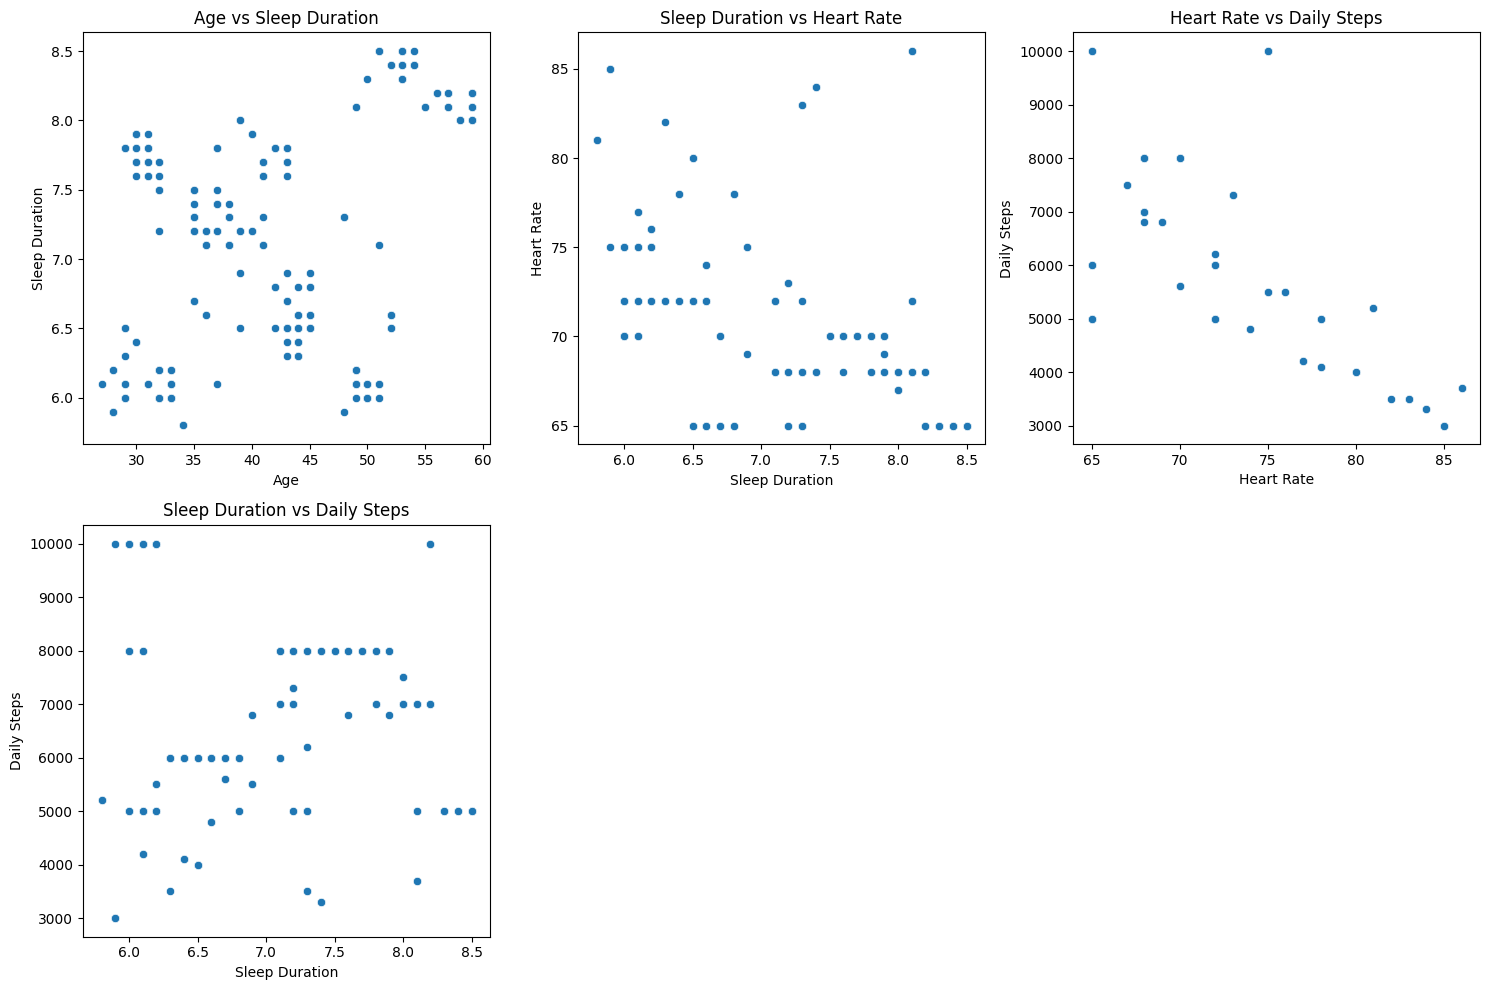

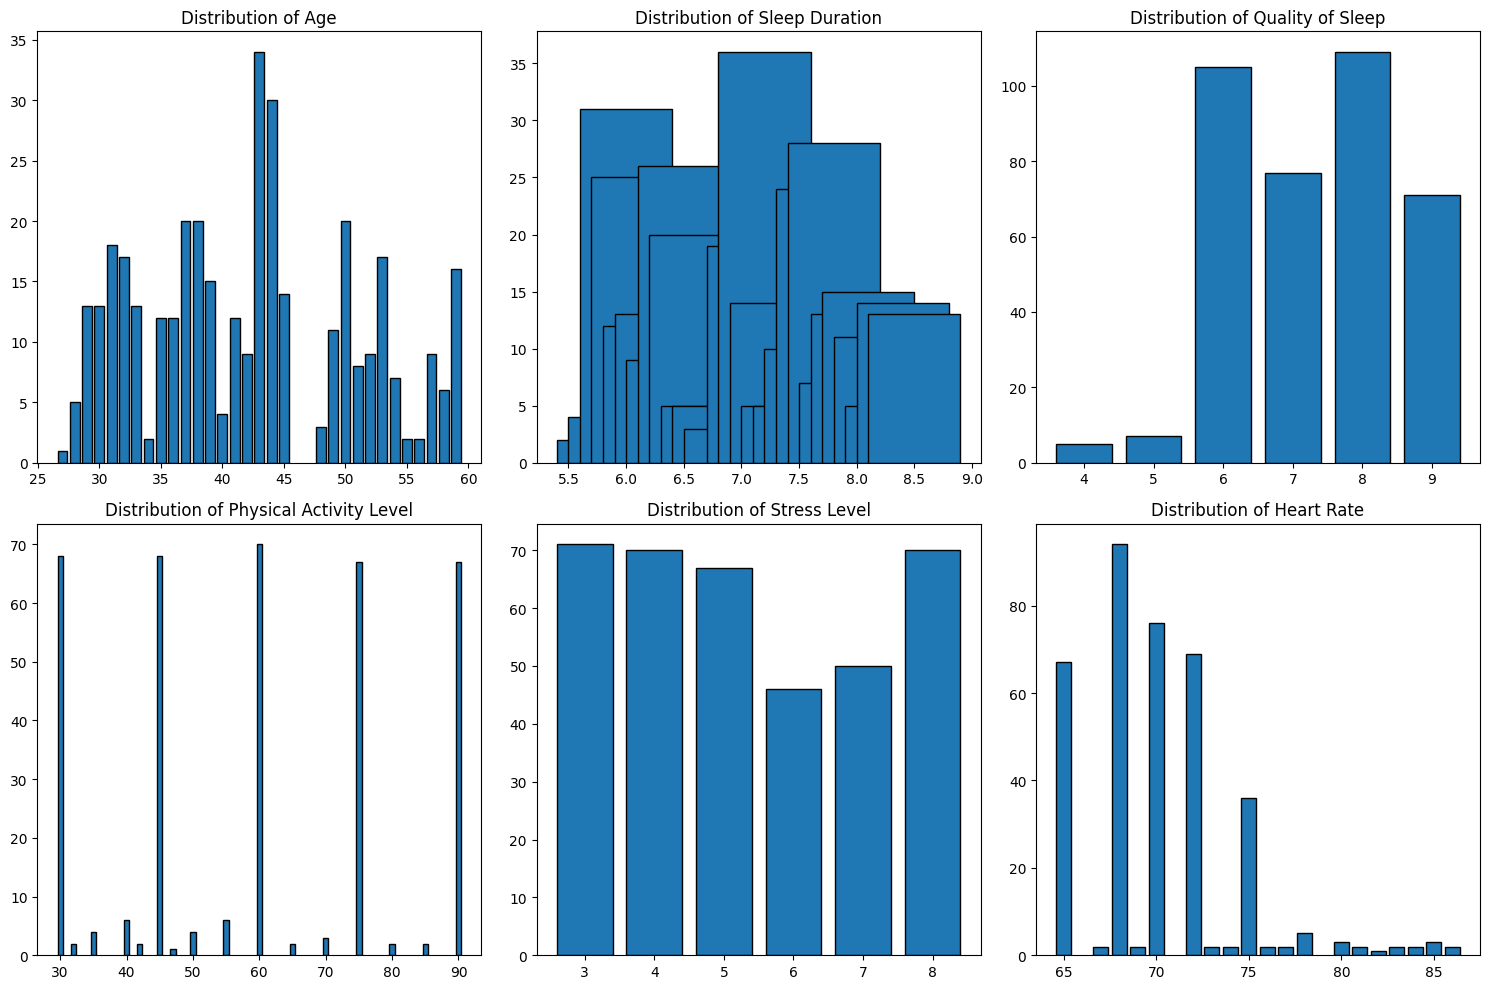

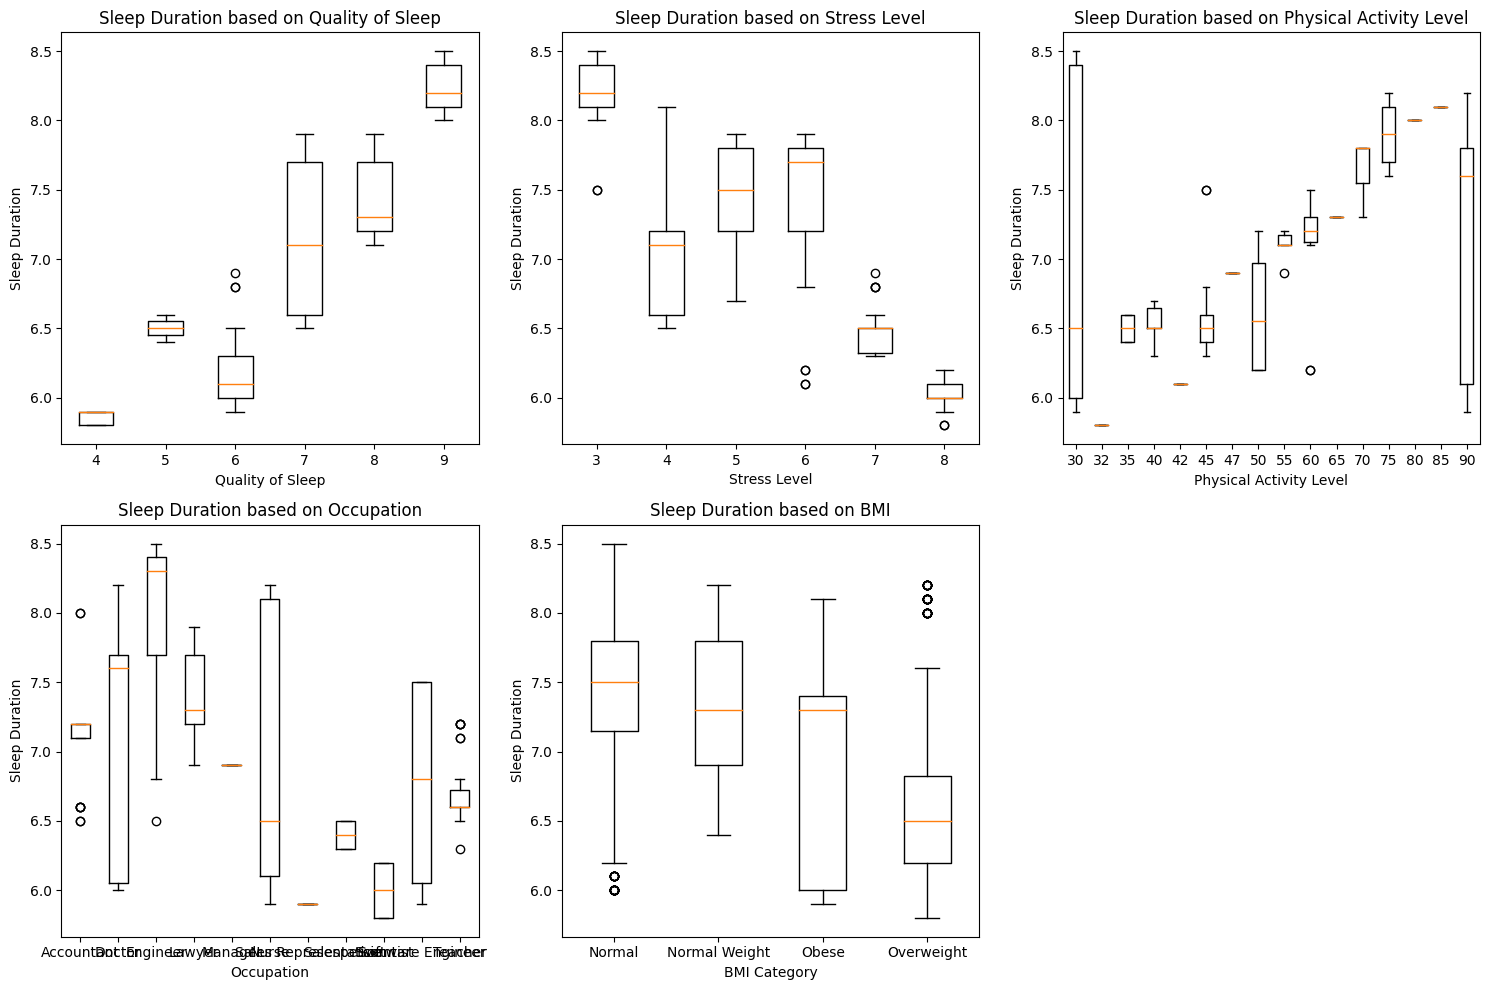

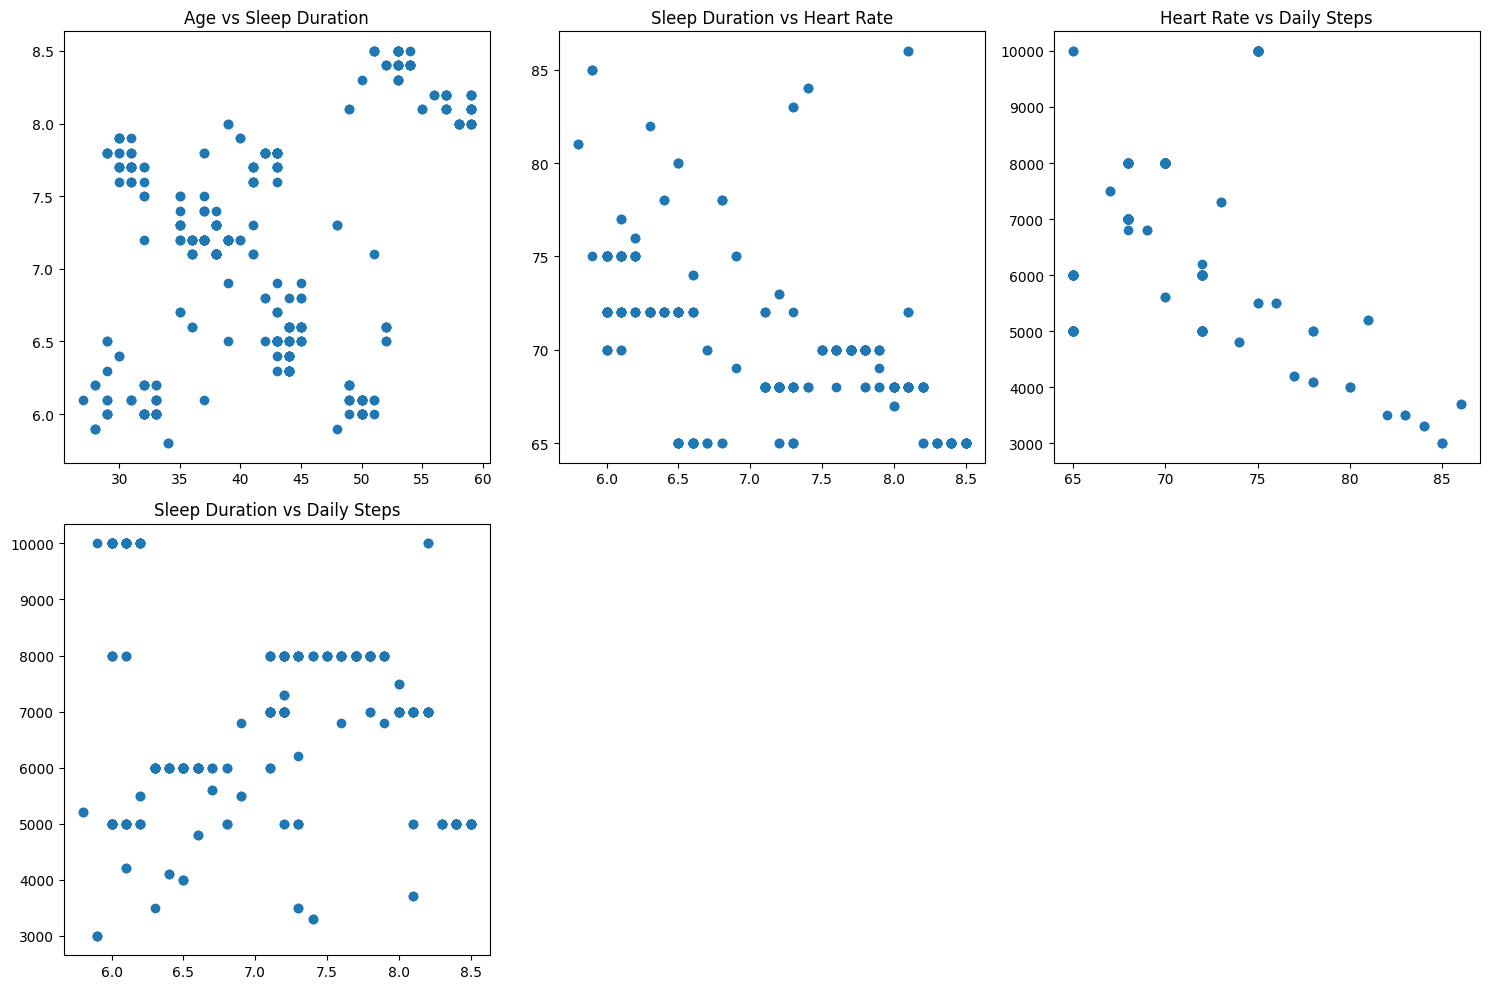


Time taken by Pandas: 1.4223518371582031 seconds
Time taken by NumPy: 1.223346471786499 seconds
NumPy is faster.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

start_time = time.time()
df = pd.read_csv('sleep_health.csv')
# Using only pandas
plt.figure(figsize=(15, 10))
plt.subplot(231)
sns.histplot(df['Age'])
plt.title('Distribution of Age')

plt.subplot(232)
sns.histplot(df['Sleep Duration'])
plt.title('Distribution of Sleep Duration')

plt.subplot(233)
sns.histplot(df['Quality of Sleep'])
plt.title('Distribution of Quality of Sleep')

plt.subplot(234)
sns.histplot(df['Physical Activity Level'])
plt.title('Distribution of Physical Activity Level')

plt.subplot(235)
sns.histplot(df['Stress Level'])
plt.title('Distribution of Stress Level')

plt.subplot(236)
sns.histplot(df['Heart Rate'])
plt.title('Distribution of Heart Rate')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
plt.subplot(231)
sns.boxplot(x='Quality of Sleep', y='Sleep Duration', data=df)
plt.title('Sleep Duration based on Quality of Sleep')

plt.subplot(232)
sns.boxplot(x='Stress Level', y='Sleep Duration', data=df)
plt.title('Sleep Duration based on Stress Level')

plt.subplot(233)
sns.boxplot(x='Physical Activity Level', y='Sleep Duration', data=df)
plt.title('Sleep Duration based on Physical Activity Level')

plt.subplot(234)
sns.boxplot(x='Occupation', y='Sleep Duration', data=df)
plt.title('Sleep Duration based on Occupation')

plt.subplot(235)
sns.boxplot(x='BMI Category', y='Sleep Duration', data=df)
plt.title('Sleep Duration based on BMI')

plt.tight_layout()
plt.show()
plt.figure(figsize=(15, 10))
plt.subplot(231)
sns.scatterplot(x='Age', y='Sleep Duration', data=df)
plt.title('Age vs Sleep Duration')

plt.subplot(232)
sns.scatterplot(x='Sleep Duration', y='Heart Rate', data=df)
plt.title('Sleep Duration vs Heart Rate')

plt.subplot(233)
sns.scatterplot(x='Heart Rate', y='Daily Steps', data=df)
plt.title('Heart Rate vs Daily Steps')

plt.subplot(234)
sns.scatterplot(x='Sleep Duration', y='Daily Steps', data=df)
plt.title('Sleep Duration vs Daily Steps')

plt.tight_layout()
plt.show()

pandas_time =time.time() - start_time

# Using only NumPy
start_time = time.time()

data = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=0, dtype=None, encoding='utf-8', names=True)
age, count1 = np.unique(data['Age'], return_counts=True)
Sleep_Duration,count2= np.unique(data['Sleep_Duration'], return_counts=True)
Quality_of_Sleep,count3= np.unique(data['Quality_of_Sleep'], return_counts=True)
Physical_Activity_Level,count4= np.unique(data['Physical_Activity_Level'], return_counts=True)
Stress_Level,count5= np.unique(data['Stress_Level'], return_counts=True)
Heart_Rate,count6= np.unique(data['Heart_Rate'], return_counts=True)

plt.figure(figsize=(15, 10))
plt.subplot(231)
plt.bar(age, count1,edgecolor='black')
plt.title('Distribution of Age')

plt.subplot(232)
plt.bar(Sleep_Duration, count2,edgecolor='black')
plt.title('Distribution of Sleep Duration')

plt.subplot(233)
plt.bar(Quality_of_Sleep, count3,edgecolor='black')
plt.title('Distribution of Quality of Sleep')

plt.subplot(234)
plt.bar(Physical_Activity_Level, count4,edgecolor='black')
plt.title('Distribution of Physical Activity Level')

plt.subplot(235)
plt.bar(Stress_Level, count5,edgecolor='black')
plt.title('Distribution of Stress Level')

plt.subplot(236)
plt.bar(Heart_Rate, count6,edgecolor='black')
plt.title('Distribution of Heart Rate')
plt.tight_layout()
plt.show()



variable1=data['Sleep_Duration']
variable2=data['Quality_of_Sleep']
variable1_list = [variable1[variable2 == i] for i in np.unique(variable2)]

plt.figure(figsize=(15, 10))
plt.subplot(231)
plt.boxplot(variable1_list, labels=np.unique(variable2))
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration')
plt.title('Sleep Duration based on Quality of Sleep')

variable1=data['Sleep_Duration']
variable2=data['Stress_Level']
variable1_list = [variable1[variable2 == i] for i in np.unique(variable2)]

plt.subplot(232)
plt.boxplot(variable1_list, labels=np.unique(variable2))
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration')
plt.title('Sleep Duration based on Stress Level')

variable1=data['Sleep_Duration']
variable2=data['Physical_Activity_Level']
variable1_list = [variable1[variable2 == i] for i in np.unique(variable2)]

plt.subplot(233)
plt.boxplot(variable1_list, labels=np.unique(variable2))
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration')
plt.title('Sleep Duration based on Physical Activity Level')

variable1=data['Sleep_Duration']
variable2=data['Occupation']
variable1_list = [variable1[variable2 == i] for i in np.unique(variable2)]

plt.subplot(234)
plt.boxplot(variable1_list, labels=np.unique(variable2))
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration')
plt.title('Sleep Duration based on Occupation')

variable1=data['Sleep_Duration']
variable2=data['BMI_Category']
variable1_list = [variable1[variable2 == i] for i in np.unique(variable2)]

plt.subplot(235)
plt.boxplot(variable1_list, labels=np.unique(variable2))
plt.xlabel('BMI Category')
plt.ylabel('Sleep Duration')
plt.title('Sleep Duration based on BMI')

plt.tight_layout()
plt.show()

age = df['Age'].values
sleep_duration = df['Sleep Duration'].values
heart_rate = df['Heart Rate'].values
daily_steps = df['Daily Steps'].values

plt.figure(figsize=(15, 10))
plt.subplot(231)
plt.scatter(age, sleep_duration)
plt.title('Age vs Sleep Duration')

plt.subplot(232)
plt.scatter(sleep_duration, heart_rate)
plt.title('Sleep Duration vs Heart Rate')

plt.subplot(233)
plt.scatter(heart_rate, daily_steps)
plt.title('Heart Rate vs Daily Steps')

plt.subplot(234)
plt.scatter(sleep_duration, daily_steps)
plt.title('Sleep Duration vs Daily Steps')

plt.tight_layout()
plt.show()

numpy_time =time.time() - start_time

print()
print(f"Time taken by Pandas: {pandas_time} seconds")
print(f"Time taken by NumPy: {numpy_time} seconds")

if pandas_time < numpy_time:
    print("Pandas is faster.")
elif pandas_time > numpy_time:
    print("NumPy is faster.")
else:
    print("Both are equally fast.")


AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy


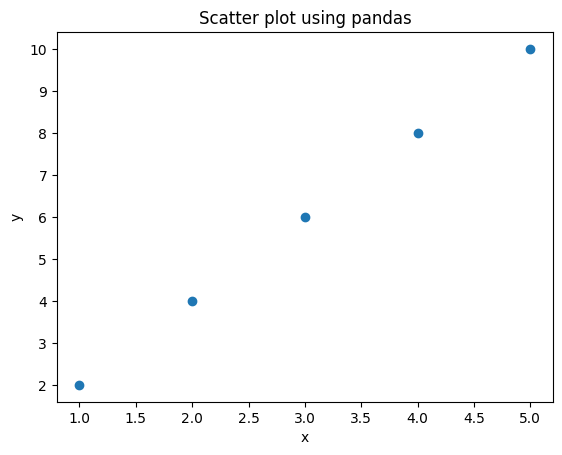

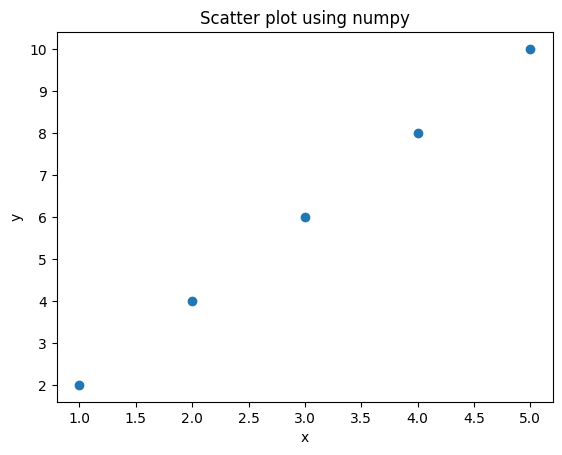


Time taken by Pandas: 0.11063313484191895 seconds
Time taken by NumPy: 0.07442569732666016 seconds
NumPy is faster.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

start_time = time.time()
data = {'x': [1, 2, 3, 4, 5], 'y': [2, 4, 6, 8, 10]}
df = pd.DataFrame(data)
plt.scatter(df['x'], df['y'])
plt.title('Scatter plot using pandas')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
pandas_time =time.time() - start_time

start_time = time.time()
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])
plt.scatter(x, y)
plt.title('Scatter plot using numpy')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
numpy_time =time.time() - start_time

print()
print(f"Time taken by Pandas: {pandas_time} seconds")
print(f"Time taken by NumPy: {numpy_time} seconds")

if pandas_time < numpy_time:
    print("Pandas is faster.")
elif pandas_time > numpy_time:
    print("NumPy is faster.")
else:
    print("Both are equally fast.")
